This code walks through the generation of data from a Poisson spiking neuron and the subsequent fitting of a Bayesian posterior over the rate parameter $\lambda$.

Let's start by loading a few packages for numerical computation and plotting.

In [3]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

Our first example will involve generating a sample from an exponential distribution and computing the associated likelihood function.

In [4]:
lam = 1     # chosen value for lambda (which we assume we don't know when parameter fitting)
x1 = np.random.exponential(scale=1/lam,size=1)  # generating a single sample
lamt = np.linspace(0,10)        # vector of possible lambda values for parameter fitting
L1 = lamt*np.exp(-lamt*x1)      # formula for our parameter likelihood (from notes)

The maximum likelihood is straightforward to compute using calculus, we simply look for the single critical point
$$
\frac{d}{d\lambda} L(\lambda | x_1) = {\rm e}^{- \lambda x_1} \left[ 1 - \lambda x_1 \right] = 0 \ \ \to \ \ \lambda = 1/x_1,
$$
and this is a maximum since $L'(\lambda|x_1)\gtrless 0$ for $\lambda \lessgtr 1/x_1$, so $L(1/x_1|x_1) = {\rm e}^{-1}/x_1$ and we will plot this point on top of the function.

Text(0, 0.5, 'likelihood')

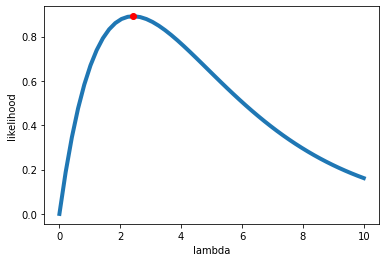

In [5]:
plt.plot(lamt,L1,linewidth=4.0)   # plotting the likelihood fnction
plt.plot(1/x1,np.exp(-1)/x1,'ro') # plotting the MLE
plt.xlabel('lambda')         # label for x-axis
plt.ylabel('likelihood')      # label for y-axis

The likelihood function peaks somewhere, but probably not right on top of the true $\lambda$ value.

Now to compute 5 samples and repeat the process from before, and note in this case, the maximum likelihood point will be
$$
L'(\lambda | x_{1:5}) = \lambda^4 {\rm e}^{-\lambda 5 \bar{x}} \left[ 5 - \lambda \sum_{j=1}^{5} x_j \right] \ \ \to \ \ \lambda = 1/\bar{x},
$$
where $\bar{x} = \frac{1}{5} \sum_{j=1}^5 x_j$ is the empirical mean of the samples, and we can compute $L(1/\bar{x}|x_{1:5}) = {\rm e}^{-5}/\bar{x}^5$.

Text(0, 0.5, 'likelihood')

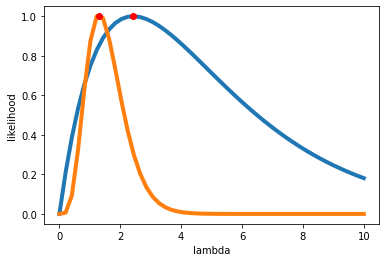

In [6]:
x = np.random.exponential(1,5)
lamt = np.linspace(0,10)
L5 = lamt**5*np.exp(-lamt*np.sum(x))
xb5 = np.mean(x)

plt.plot(lamt,L1/max(L1),linewidth=4.0)
plt.plot(1/x1,1,'ro')
plt.plot(lamt,L5/max(L5),linewidth=4.0)
plt.plot(1/xb5,1,'ro')
plt.xlabel('lambda')         # label for x-axis
plt.ylabel('likelihood')      # label for y-axis

By comparison, we can see that the likelihood function (normalized to have the same max value of 1) is probably narrower and maybe has its peak location closer to the true $\lambda$. We can check this by computing the MLE after one and five samples below.

In [8]:
print(1/x1)    # from one sample
print(1/xb5)   # from five samples

[2.42352937]
1.3088044342761305


Now, consider 10 samples, noting again the maximum likelihood will be given 
$$
L'(\lambda | x_{1:10}) = \lambda^9 {\rm e}^{-\lambda 10 \bar{x}} \left[ 10 - \lambda \sum_{j=1}^{10} x_j \right] \ \ \to \ \ \lambda = 1/\bar{x},
$$
so $L(1/\bar{x}|x_{1:10}) = {\rm e}^{-10}/\bar{x}^{10}$.

Text(0, 0.5, 'likelihood')

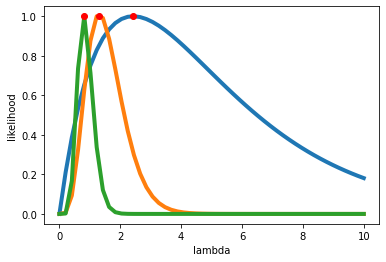

In [9]:
x = np.random.exponential(1,10)
lamt = np.linspace(0,10)
L10 = lamt**10*np.exp(-lamt*np.sum(x))
xb10 = np.mean(x)

plt.plot(lamt,L1/max(L1),linewidth=4.0)
plt.plot(1/x1,1,'ro')
plt.plot(lamt,L5/max(L5),linewidth=4.0)
plt.plot(1/xb5,1,'ro')
plt.plot(lamt,L10/max(L10),linewidth=4.0)
plt.plot(1/xb10,1,'ro')
plt.xlabel('lambda')         # label for x-axis
plt.ylabel('likelihood')      # label for y-axis

In [10]:
print(1/xb10)

0.7941588360332003


The MLE after 10 samples may or may not be closer to the true $\lambda$, again because of the noisiness of sampling, but across running this many times, more samples should yield a closer MLE (to the true $\lambda$).

OK, so now let's take 100 samples, so the maximum likelihood will be given 
$$
L'(\lambda | x_{1:100}) = \lambda^{99} {\rm e}^{-\lambda 100 \bar{x}} \left[ 100 - \lambda \sum_{j=1}^{100} x_j \right] \ \ \to \ \ \lambda = 1/\bar{x},
$$
so $L(1/\bar{x}|x_{1:100}) = {\rm e}^{-100}/\bar{x}^{100}$.

Text(0, 0.5, 'likelihood')

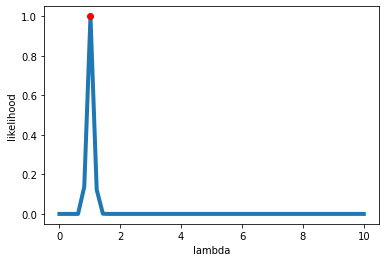

In [11]:
x = np.random.exponential(1,100)
lamt = np.linspace(0,10)
L100 = lamt**100*np.exp(-lamt*np.sum(x))
xb100 = np.mean(x)

plt.plot(lamt,L100/max(L100),linewidth=4.0)
plt.plot(1/xb100,1,'ro')
plt.xlabel('lambda')         # label for x-axis
plt.ylabel('likelihood')      # label for y-axis

This likelihood should be much peakier than those preceding, and with any luck, we are quite close to the true $\lambda$ with our MLE.

In [12]:
print(1/xb100)

1.0038642147563197


Eventually, this will look like the function $\delta (\lambda-1)$ in the limit of many samples.